**Ex**: **1**

In [ ]:
import tensorflow as tf
a = tf.constant( [
    [2,3,4,5,6],
    [5,2,3,6,1],
    [1,2,3,4,5]])
ab=tf.math.reduce_max(a,axis=1)
print(ab)

tf.Tensor([6 6 5], shape=(3,), dtype=int32)


In [ ]:
#perform vector addition
a = tf.constant( [
    [2,3,4,5,6],
    [5,2,3,6,1],
    [1,2,3,4,5]])
b = tf.constant( [
    [2,3,4,5,6],
    [5,2,3,6,1],
    [1,2,3,4,5]])
c=tf.add(a,b)
print(c)

tf.Tensor(
[[ 4  6  8 10 12]
 [10  4  6 12  2]
 [ 2  4  6  8 10]], shape=(3, 5), dtype=int32)


In [ ]:
#add tensor and a list of same shape in tensorflow
list = [[2,3,4,5,6],
    [5,2,3,6,1],
    [1,2,3,4,5]]
b = tf.constant( [
    [2,3,4,5,6],
    [5,2,3,6,1],
    [1,2,3,4,5]])
c=tf.add(list,a)
print(c)

tf.Tensor(
[[ 4  6  8 10 12]
 [10  4  6 12  2]
 [ 2  4  6  8 10]], shape=(3, 5), dtype=int32)


**EX**:**2** **LINEAR** **REGRESSION**

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime

In [ ]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print(tf.__version__)

# Load the TensorBoard notebook extension.
%load_ext tensorboard

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.8.2


In [ ]:
# Download the daset with keras.utils.get_file
dataset_path = keras.utils.get_file("housing.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data")

57344/49082 [===================================] - 0s 1us/step


In [ ]:
column_names = ['CRIM','ZN','INDUS','CHAS','NOX',
                'RM', 'AGE', 'DIS','RAD','TAX','PTRATION', 'B', 'LSTAT', 'MEDV']
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)
# Create a dataset instant
dataset = raw_dataset.copy()

# This function returns last n rows from the object 
# based on position.
dataset.tail(n=10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATION,B,LSTAT,MEDV
496,0.28960,0.0,9.69,0,0.585,5.390,72.9,2.7986,6,391.0,19.2,396.90,21.14,19.7
497,0.26838,0.0,9.69,0,0.585,5.794,70.6,2.8927,6,391.0,19.2,396.90,14.10,18.3
498,0.23912,0.0,9.69,0,0.585,6.019,65.3,2.4091,6,391.0,19.2,396.90,12.92,21.2
499,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391.0,19.2,395.77,15.10,17.5
500,0.22438,0.0,9.69,0,0.585,6.027,79.7,2.4982,6,391.0,19.2,396.90,14.33,16.8
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


In [ ]:
# Split data into train/test
# p = training data portion
p=0.8
trainDataset = dataset.sample(frac=p,random_state=0)
testDataset = dataset.drop(trainDataset.index)

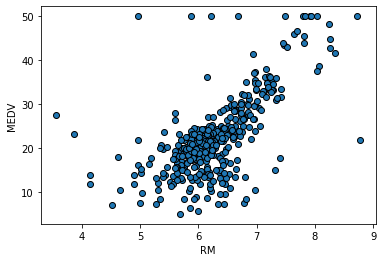

In [ ]:
# Visual representation of training data
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
# With .pop() command, the associated columns are extracted.
x = trainDataset['RM']
y = trainDataset['MEDV']
ax.scatter(x, y, edgecolors=(0, 0, 0))
ax.set_xlabel('RM')
ax.set_ylabel('MEDV')
plt.show()

In [ ]:
# Pop command return item and drop it from frame.
# After using trainDataset.pop('RM'), the 'RM' column 
# does not exist in the trainDataset frame anymore!
trainInput = trainDataset['RM']
trainTarget = trainDataset['MEDV']
testInput = testDataset['RM']
testTarget = testDataset['MEDV']

In [ ]:
def linear_model():
  model = keras.Sequential([
        layers.Dense(1, use_bias=True, input_shape=(1,), name='layer')
      ])

  # Using adam optimizer
  optimizer = tf.keras.optimizers.Adam(
      learning_rate=0.01, beta_1=0.9, beta_2=0.99, epsilon=1e-05, amsgrad=False,
      name='Adam')
    
  # Check: https://www.tensorflow.org/api_docs/python/tf/keras/Model
  # loss: String (name of objective function), objective function or tf.keras.losses.Loss instance. See tf.keras.losses.
  # optimizer: String (name of optimizer) or optimizer instance. See tf.keras.optimizers.
  # metrics: List of metrics to be evaluated by the model during training and testing
  model.compile(loss='mse', optimizer=optimizer, metrics=['mae','mse'])

  return model

# Create model instant
model = linear_model()

# Model plot
tf.keras.utils.plot_model(
  model, to_file='model.png', show_shapes=True, show_layer_names=True,
  rankdir='TB', expand_nested=False, dpi=100
  )

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# params
n_epochs = 4000
batch_size = 256
n_idle_epochs = 100
n_epochs_log = 200
n_samples_save = n_epochs_log * trainInput.shape[0]
print('Checkpoint is saved for each {} samples'.format(n_samples_save))

# A mechanism that stops training if the validation loss is not improving for more than n_idle_epochs.
#See https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping for details.
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=n_idle_epochs, min_delta=0.001)

# Creating a custom callback to print the log after a certain number of epochs
# Check: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks
predictions_list = []
class NEPOCHLogger(tf.keras.callbacks.Callback):
    def __init__(self,per_epoch=100):
        '''
        display: Number of batches to wait before outputting loss
        '''
        self.seen = 0
        self.per_epoch = per_epoch
    
    def on_epoch_end(self, epoch, logs=None):
      if epoch % self.per_epoch == 0:
        print('Epoch {}, loss {:.2f}, val_loss {:.2f}, mae {:.2f}, val_mae {:.2f}, mse {:.2f}, val_mse {:.2f}'\
              .format(epoch, logs['loss'], logs['val_loss'],logs['mae'], logs['val_mae'],logs['mse'], logs['val_mse']))
              
# Call the object
log_display = NEPOCHLogger(per_epoch=n_epochs_log)

# Include the epoch in the file name (uses `str.format`)
import os
checkpoint_path = "training/cp-{epoch:05d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights every 5 epochs
checkpointCallback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=1, 
    save_weights_only=True,
    save_freq=n_samples_save)

# Save the weights using the `checkpoint_path` format
model.save_weights(checkpoint_path.format(epoch=0))

# Define the Keras TensorBoard callback.
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

history = model.fit(
  trainInput, trainTarget, batch_size=batch_size,
  epochs=n_epochs, validation_split = 0.1, verbose=0, callbacks=[earlyStopping,log_display,tensorboard_callback,checkpointCallback])

Checkpoint is saved for each 81000 samples
Epoch 0, loss 369.25, val_loss 445.85, mae 17.30, val_mae 18.54, mse 369.25, val_mse 445.85
Epoch 200, loss 54.91, val_loss 92.56, mae 5.25, val_mae 6.78, mse 54.91, val_mse 92.56
Epoch 400, loss 53.93, val_loss 90.87, mae 5.25, val_mae 6.73, mse 53.93, val_mse 90.87
Epoch 600, loss 52.22, val_loss 90.07, mae 5.13, val_mae 6.63, mse 52.22, val_mse 90.07
Epoch 800, loss 50.56, val_loss 88.83, mae 5.03, val_mae 6.52, mse 50.56, val_mse 88.83
Epoch 1000, loss 49.07, val_loss 87.59, mae 4.95, val_mae 6.41, mse 49.07, val_mse 87.59
Epoch 1200, loss 47.79, val_loss 87.11, mae 4.85, val_mae 6.35, mse 47.79, val_mse 87.11
Epoch 1400, loss 46.66, val_loss 86.30, mae 4.78, val_mae 6.28, mse 46.66, val_mse 86.30
Epoch 1600, loss 45.77, val_loss 85.63, mae 4.72, val_mae 6.23, mse 45.77, val_mse 85.63


keys: dict_keys(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'])


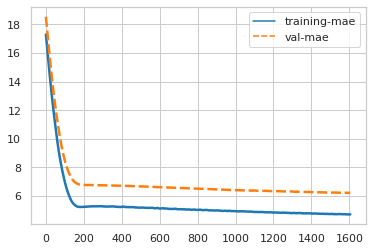

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

# The fit model returns the history object for each Keras model
# Let's explore what is inside history
print('keys:', history.history.keys())

# Returning the desired values for plotting and turn to numpy array
mae = np.asarray(history.history['mae'])
val_mae = np.asarray(history.history['val_mae'])

# Creating the data frame
num_values = (len(mae))
values = np.zeros((num_values,2), dtype=float)
values[:,0] = mae
values[:,1] = val_mae

# Using pandas to frame the data
steps = pd.RangeIndex(start=0,stop=num_values)
data = pd.DataFrame(values, steps, columns=["training-mae", "val-mae"])

# Plotting
sns.set(style="whitegrid")
sns.lineplot(data=data, palette="tab10", linewidth=2.5)

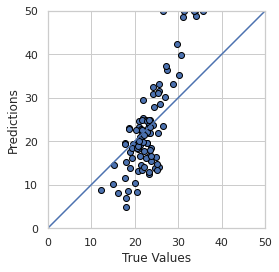

In [ ]:
predictions = model.predict(testInput).flatten()
a = plt.axes(aspect='equal')
plt.scatter(predictions, testTarget, edgecolors=(0, 0, 0))
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

# **EX**:**3 Multi**-**Layer** **Perceptron** 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import argparse

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics


import keras
from keras import models
from tensorflow.keras.models import Sequential
from keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD
from sklearn.neural_network import MLPClassifier # neural network

In [2]:
a = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/iris.csv')
iris = pd.DataFrame(a)
iris.head()


,150,4,setosa,versicolor,virginica
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
iris.shape

(150, 5)

In [4]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)


In [7]:
clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(3, 3), random_state=1)

In [8]:
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(3, 3), random_state=1)

In [9]:
prediction = clf.predict(X_test)
print(prediction)

[2 1 1 2 1 1 2 1 2 0 1 2 0 1 0 1 2 2 1 2 2 0 1 2 2 2 1 2 1 2 1 0 1 1 2 2 1
 0 0 1 2 2 1 0 0]


In [10]:
print('The accuracy of the Multi-layer Perceptron is:',metrics.accuracy_score(prediction,y_test))

The accuracy of the Multi-layer Perceptron is: 0.8


In [11]:
train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)

In [12]:
network = models.Sequential()
network.add(layers.Dense(32, activation='relu', input_shape=(4,)))
network.add(layers.Dense(64, activation='relu'))
network.add(layers.Dense(128, activation='relu'))
network.add(layers.Dense(3, activation='softmax'))

In [13]:
learning_rate=0.01
sgd=SGD(learning_rate)
network.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [14]:
H=network.fit(X_train, train_labels, epochs=100, batch_size=10,validation_split=0.2)

Epoch 1/100
9/9 [==============================] - 1s 29ms/step - loss: 1.0686 - accuracy: 0.3333 - val_loss: 0.9972 - val_accuracy: 0.7143
Epoch 2/100
9/9 [==============================] - 0s 7ms/step - loss: 0.9606 - accuracy: 0.5833 - val_loss: 0.9160 - val_accuracy: 0.6667
Epoch 3/100
9/9 [==============================] - 0s 8ms/step - loss: 0.8568 - accuracy: 0.6667 - val_loss: 0.8444 - val_accuracy: 0.7143
Epoch 4/100
9/9 [==============================] - 0s 5ms/step - loss: 0.8001 - accuracy: 0.6429 - val_loss: 0.7816 - val_accuracy: 0.7143
Epoch 5/100
9/9 [==============================] - 0s 5ms/step - loss: 0.7500 - accuracy: 0.7262 - val_loss: 0.7189 - val_accuracy: 0.7143
Epoch 6/100
9/9 [==============================] - 0s 7ms/step - loss: 0.7125 - accuracy: 0.7262 - val_loss: 0.6451 - val_accuracy: 0.7143
Epoch 7/100
9/9 [==============================] - 0s 7ms/step - loss: 0.6616 - accuracy: 0.7500 - val_loss: 0.5911 - val_accuracy: 0.8095
Epoch 8/100
9/9 [=========

In [15]:
H.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

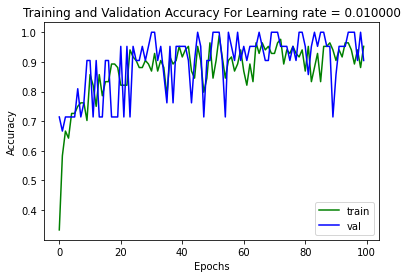

In [16]:
Acc_train = H.history['accuracy']
Accu_val = H.history['val_accuracy']
plt.plot(Acc_train, 'g', label='Training accuracy')
plt.plot(Accu_val, 'b', label='validation accuracy')
plt.title('Training and Validation Accuracy For Learning rate = %f' % learning_rate)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train','val'],loc='lower right')
plt.show()

In [17]:
test_loss, test_acc = network.evaluate(X_test, test_labels)
train_loss, train_acc = network.evaluate(X_train, train_labels)

print('Test Accuracy: ', test_acc, '\nTest Loss: ', test_loss)
print('Train Accuracy: ', train_acc, '\nTrain Loss: ', train_loss)

4/4 [==============================] - 0s 4ms/step - loss: 0.4618 - accuracy: 0.7905
Test Accuracy:  0.8444444537162781 
Test Loss:  0.3831978738307953
Train Accuracy:  0.7904762029647827 
Train Loss:  0.4617863595485687


# **EX:4** ANN SALES DATASET



In [19]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/housepricedata.csv')

In [20]:
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [21]:
#Converting our dataframe into an array
dataset = df.values
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [22]:
#split dataset into input features (X), predict (Y)
X = dataset[:,0:10]
Y = dataset[:,10]

In [23]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [28]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model_2.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 4s 73ms/step - loss: 0.4798 - accuracy: 0.7759 - val_loss: 0.4171 - val_accuracy: 0.8128
Epoch 2/100
32/32 [==============================] - 1s 45ms/step - loss: 0.3632 - accuracy: 0.8552 - val_loss: 0.3442 - val_accuracy: 0.8630
Epoch 3/100
32/32 [==============================] - 1s 40ms/step - loss: 0.3192 - accuracy: 0.8630 - val_loss: 0.3083 - val_accuracy: 0.8767
Epoch 4/100
32/32 [==============================] - 1s 38ms/step - loss: 0.2841 - accuracy: 0.8875 - val_loss: 0.3170 - val_accuracy: 0.8493
Epoch 5/100
32/32 [==============================] - 1s 38ms/step - loss: 0.2895 - accuracy: 0.8855 - val_loss: 0.3323 - val_accuracy: 0.8402
Epoch 6/100
32/32 [==============================] - 1s 38ms/step - loss: 0.2806 - accuracy: 0.8728 - val_loss: 0.2860 - val_accuracy: 0.8676
Epoch 7/100
32/32 [==============================] - 1s 38ms/step - loss: 0.2516 - accuracy: 0.9012 - val_loss: 0.2802 - val_accuracy: 0.8813
Epoch 

In [30]:
# evaluate it on the test set
#1 returns the loss as the first element and the accuracy as the second element
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 2ms/step - loss: 0.6477 - accuracy: 0.7352


0.7351598143577576

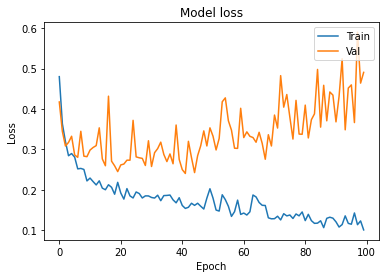

In [31]:
#Below graph shown as clear overfitting 
import matplotlib.pyplot as plt
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [32]:
#adding regularizers
from keras.layers import Dropout
from keras import regularizers
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])
model_3.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [33]:
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 53ms/step - loss: 30.7176 - accuracy: 0.5479 - val_loss: 30.5179 - val_accuracy: 0.4795
Epoch 2/100
32/32 [==============================] - 2s 47ms/step - loss: 30.3333 - accuracy: 0.5313 - val_loss: 30.1368 - val_accuracy: 0.4795
Epoch 3/100
32/32 [==============================] - 2s 68ms/step - loss: 29.9551 - accuracy: 0.5294 - val_loss: 29.7607 - val_accuracy: 0.4795
Epoch 4/100
32/32 [==============================] - 2s 63ms/step - loss: 29.5808 - accuracy: 0.5254 - val_loss: 29.3895 - val_accuracy: 0.4795
Epoch 5/100
32/32 [==============================] - 1s 47ms/step - loss: 29.2128 - accuracy: 0.5127 - val_loss: 29.0229 - val_accuracy: 0.4795
Epoch 6/100
32/32 [==============================] - 1s 47ms/step - loss: 28.8478 - accuracy: 0.5186 - val_loss: 28.6611 - val_accuracy: 0.4795
Epoch 7/100
32/32 [==============================] - 1s 46ms/step - loss: 28.4897 - accuracy: 0.5127 - val_loss: 28.3037 - val_accuracy:

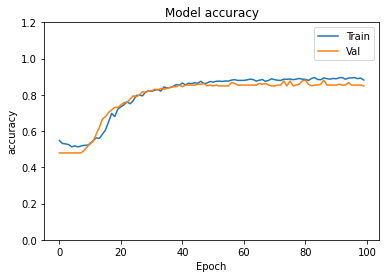

In [41]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()